## Blop detection notebook



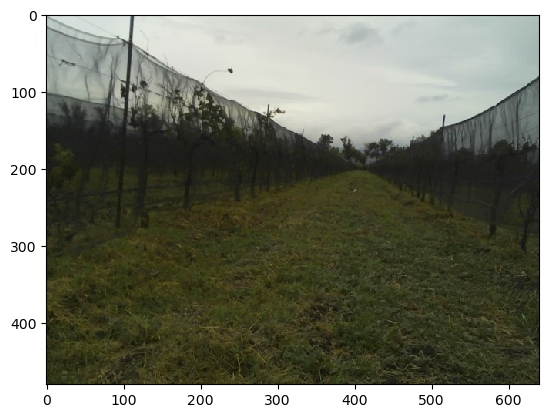

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

#img = cv2.imread("test_images/20221002-223527.jpg")
#img = cv2.imread("test_images/20221002-223338.jpg")
img = cv2.imread("test_images/20221019-203009.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(original)
plt.show()
image=original

## Grayscale transformation


(480, 640)

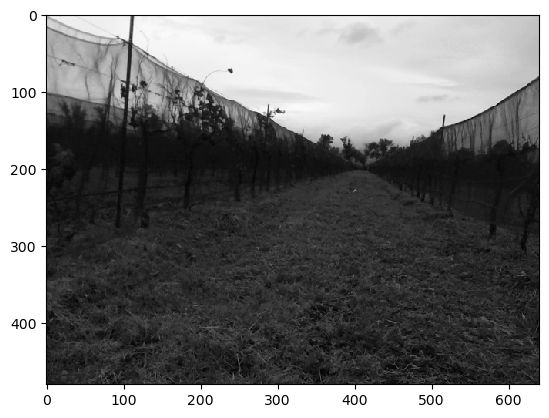

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

## Otsu Method




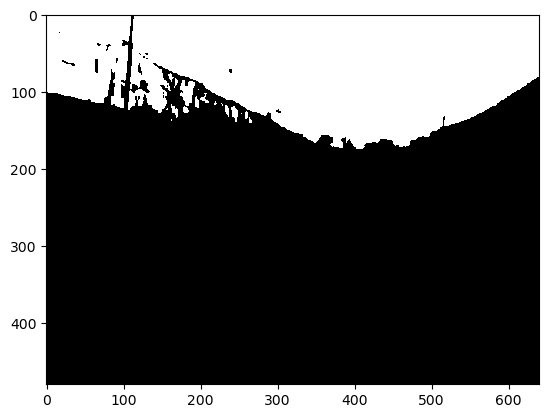

In [3]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')



## Chose the biggest blop

19


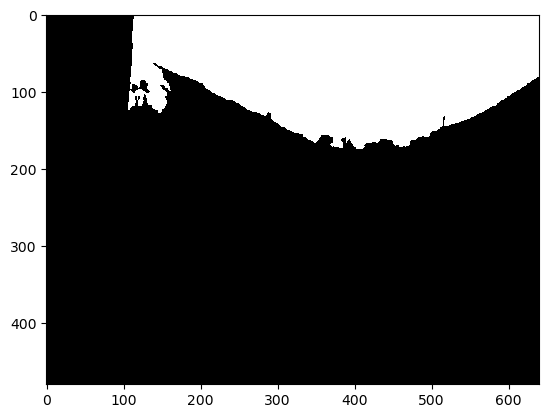

In [4]:
contours,hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
output = otsu.copy()
maxContour = 0
for contour in contours:
    
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour

# Create a mask from the largest contour
mask = np.zeros_like(otsu)
mask = mask.astype('uint8')
mask=cv2.fillPoly(mask,[maxContourData],1)
print (len(contours))
plt.imshow(mask,cmap='gray')
otsu = mask


## Edge detection



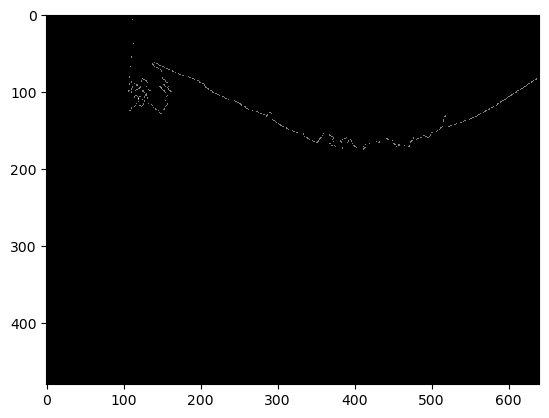

In [5]:
sobelxy = cv2.Sobel(src=mask, ddepth=-1, dx=1, dy=1)

#ret,sobelxy = cv2.threshold(sobelxy,0,255,cv2.THRESH_BINARY)

#sobelxy = sobelxy.astype('uint8')

plt.imshow(sobelxy,cmap='gray')


In [6]:
print(sobelxy[6][112])
print(sobelxy.shape)

1
(480, 640)


In [7]:
cont= 0
for n in sobelxy:
    print(cont,n)
    cont += 1

0 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
n_cont = 0
for n in sobelxy:
    m_cont = 0
    for m in n:
        if m ==1:
            print(n_cont,",",m_cont)
        m_cont += 1
    n_cont += 1

print(sobelxy)

6 , 112
7 , 112
21 , 111
22 , 111
37 , 113
38 , 113
44 , 111
45 , 111
55 , 110
56 , 110
62 , 140
62 , 141
63 , 142
63 , 143
64 , 137
64 , 138
64 , 143
64 , 144
65 , 138
65 , 139
65 , 145
65 , 146
66 , 139
66 , 147
66 , 148
67 , 109
67 , 140
67 , 141
67 , 149
67 , 150
68 , 109
68 , 140
68 , 141
68 , 151
68 , 152
69 , 143
69 , 144
69 , 153
69 , 154
70 , 145
70 , 146
70 , 156
70 , 157
71 , 146
71 , 147
71 , 157
71 , 158
72 , 148
72 , 159
72 , 160
73 , 149
73 , 163
73 , 164
74 , 149
74 , 164
74 , 165
75 , 167
75 , 168
76 , 150
76 , 169
76 , 170
77 , 150
77 , 171
77 , 172
78 , 173
78 , 174
79 , 177
79 , 178
80 , 180
80 , 181
81 , 108
81 , 184
81 , 185
82 , 108
82 , 151
82 , 186
82 , 187
83 , 125
83 , 151
83 , 190
83 , 191
83 , 636
83 , 637
84 , 126
84 , 127
84 , 152
84 , 153
84 , 192
84 , 193
84 , 635
84 , 636
85 , 128
85 , 129
85 , 152
85 , 153
85 , 194
85 , 195
85 , 633
85 , 634
86 , 123
86 , 129
86 , 130
86 , 154
86 , 155
86 , 196
86 , 197
86 , 632
86 , 633
87 , 110
87 , 123
87 , 130
87 

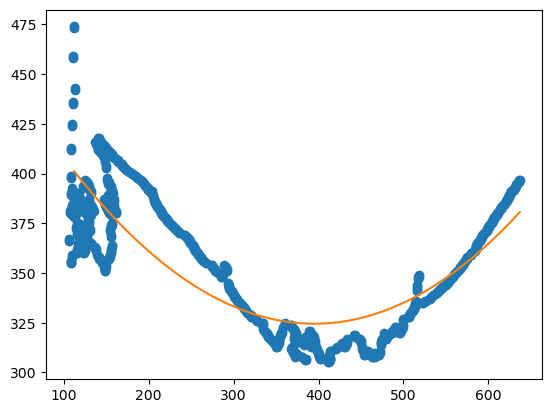

In [9]:
y=480
x=640

x_list = []
y_list = []

y_cont = y
for y in sobelxy:
    x_cont = 0
    for x in y:
        if x ==1:
            y_list.append(y_cont)
            x_list.append(x_cont)
        x_cont += 1
    y_cont -= 1

#LINE
#trend = np.polyfit(x_list,y_list,1)
#plt.plot(x_list,y_list,'o')
#trendpoly = np.poly1d(trend) 
#plt.plot(x_list,trendpoly(x_list))

#CURVE
trend = np.polyfit(x_list,y_list,2)
trendpoly = np.poly1d(trend) 

new_x = np.linspace(x_list[0], max(x_list))
new_y = trendpoly(new_x)
plt.plot(x_list, y_list, 'o', new_x, new_y)
#plt.xlim([x_list[0]-1, x_list[-1] + 1 ])


26
390.57142857142856
390


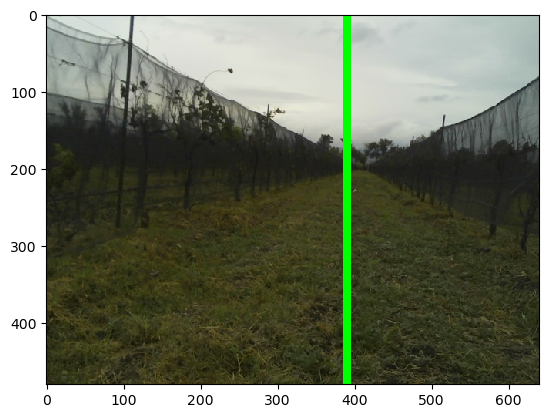

In [10]:
from math import floor  

#Find the point ath the half of the curve
lowest_yindex=np.where(new_y == np.amin(new_y))
print(lowest_yindex[0][0])
print(new_x[lowest_yindex[0][0]])
point_x = int(new_x[lowest_yindex[0][0]])
print(point_x)
original_copy = original
cv2.line(original_copy,(point_x,0),(point_x,480),(0,255,0),9)
#cv2.line(original,(index,0),(index,x),(255,0,0),9)
plt.imshow(original_copy, cmap='gray')


## Line detection



line 0
line 1
line 2
line 3
line 4


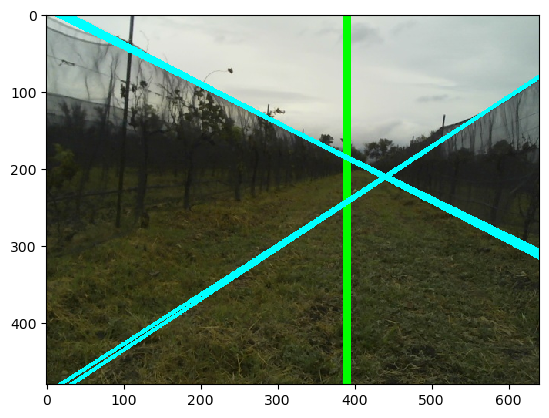

In [11]:
#lines = cv2.HoughLines(sobelxy,1, np.pi / 360, 50, None, 0, 0) 
lines = cv2.HoughLines(sobelxy,1, np.pi / 270, 50, None, 0, 0) 

#lines = cv2.HoughLinesP(sobelxy,1, np.pi / 270, 50, 100,0) 

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,255,255), 3)
        print('line',i)
else:
    print("NO LINES DETECTED")
#cv2.imshow('houghlines',img)
plt.imshow(image)
plt.show()


## Colum sum analisys

In [12]:
x,y = otsu.shape
maxval = 0
otsu[0,639]
for i in range(y):
    value = np.sum(otsu[:,i])
    if value > maxval:
        maxval = value
        index = i
print(index)


403


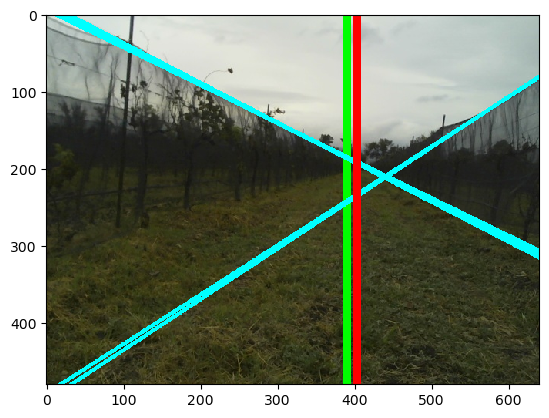

In [13]:
cv2.line(original,(index,0),(index,x),(255,0,0),9)
plt.imshow(original, cmap='gray')
plt.imshow(original_copy, cmap='gray')